### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under 20), coffee houses, carry out & take away, bar, and more expensive restaurants (20 - 50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
#Car data is incomplete and doesn't make much sense
#What does 'do not drive' mean? Probably best to remove from dataset
car = data['car'].unique()
car

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#Dropping 'car' column
data = data.drop('car', axis=1)

#Removing remaining rows with null values
data = data.dropna()

In [12]:
#Cleaning 'income' column to numeric value of lower bound
data['income_min'] = data['income'].str.replace('$', '').str.split(' - ').str[0]
data['income_min'] = data['income_min'].str.replace(' or More', '')
data['income_min'] = data['income_min'].str.replace('Less than 12500', '0').astype(int)

#Cleaning 'age' column to integers. 'below21' is changed to '16' 
data['age'] = data['age'].str.replace('plus', '')
data['age'] = data['age'].str.replace('below21', '16').astype(int)

#Cleaning 'time' column to 24 hour integer
old = {'7AM', '10AM', '2PM', '6PM', '10PM'}
new = {7, 10, 14, 18, 22}
replacements = {"7AM": 7, "10AM": 10, "2PM": 14, "6PM": 18, "10PM": 22}

for old, new in replacements.items():
    data = data.replace(old, new)


data

C:\Users\Brian\AppData\Local\Temp\ipykernel_11004\1890906470.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(old, new)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_min
22,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,62500
23,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,Work,Alone,Snowy,30,7,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,0,75000
12683,Work,Alone,Sunny,80,7,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0,75000


4. What proportion of the total observations chose to accept the coupon?



In [14]:
#Using iloc[] to divide count of 'destination' for Y=1 by the count of all values. Since every data point has a destination,
#iloc[1,0] works out to be the count of coupons accepted
accepted = data.groupby('Y').agg('count').iloc[1,0]
total = data['destination'].count()
accepted_proportion = accepted / total
accepted_proportion

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

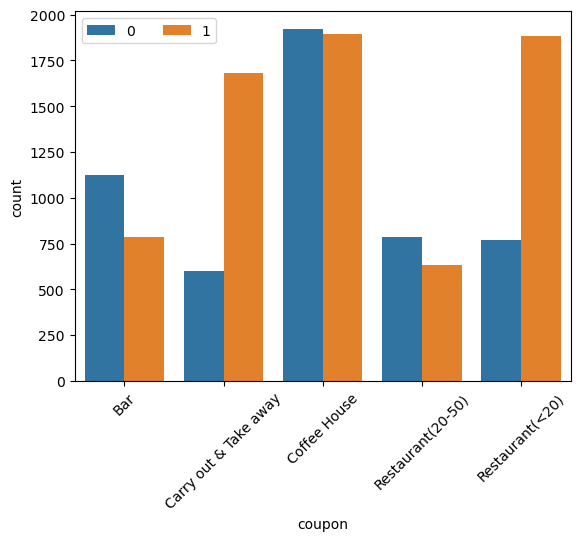

In [16]:
coupons = data.groupby(['coupon', 'Y']).agg('count')
coupons['count'] = coupons['destination']
barplot = sns.barplot(coupons, x='coupon', y='count', hue='Y')

labels = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']
barplot.set_xticks(labels)
barplot.set_xticklabels(labels, rotation=45)
barplot.legend(ncols=2)
plt.savefig('images/Coupon Histogram.png')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

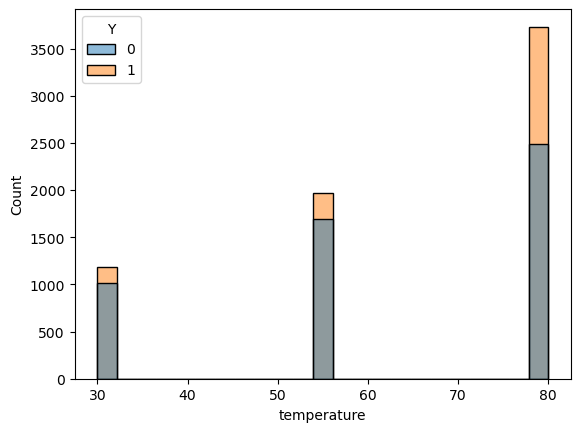

In [18]:
sns.histplot(data=data, x='temperature', hue='Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar = data.query('coupon == "Bar"')
bar.count()

destination    1913
passanger      1913
               ... 
Y              1913
income_min     1913
Length: 26, dtype: int64

2. What proportion of bar coupons were accepted?


In [22]:
#Using iloc[] to divide count of 'destination' for Y=1 by the count for Y=0.
bar_accepted = bar.groupby('Y').agg('count').iloc[1,0]
bar_total = bar['destination'].count()
bar_acceptance = bar_accepted / bar_total
bar_acceptance

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
#Grouping by bar visits/month and acceptance
bar_Y_index = bar.groupby(['Bar', 'Y']).agg('count')

#Creating data frames for each group (<3 visits Y/N, and >3 visits Y/N)
three_fewer_y = bar_Y_index.query('Y == 1 and (Bar == "1~3" | Bar == "less1" | Bar == "never")')
three_fewer_total = bar_Y_index.query('(Bar == "1~3" | Bar == "less1" | Bar == "never")')
three_plus_y = bar_Y_index.query('Y == 1 and (Bar == "4-8" | Bar == "gt8")')
three_plus_total = bar_Y_index.query('(Bar == "4-8" | Bar == "gt8")')

#Calculating acceptance rate for <3 visits and >3 visits
three_fewer_acceptance = three_fewer_y['destination'].agg('sum') / three_fewer_total['destination'].agg('sum')
three_plus_acceptance = three_plus_y['destination'].agg('sum') / three_plus_total['destination'].agg('sum')

In [25]:
#Creating dataframe to track output of each question
bar_acceptance = pd.DataFrame({'Overall': [bar_acceptance], '<3 Visits': [three_fewer_acceptance], '>3 Visits': [three_plus_acceptance]})
bar_acceptance

,Overall,<3 Visits,>3 Visits
0,0.411918,0.372674,0.717391


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
#Grouping by bar visits/month, age, and acceptance
bar_Y_age_index = bar.groupby(['Bar', 'age', 'Y']).agg('count')

#Creating two dataframes for accepted and not accepted
# bar_accepted = bar_Y_age_index.query('Y == 1')
# bar_declined = bar_Y_age_index.query('Y == 0')

#Querying on age >25 and more than 1 bar visit for accepted and declined
bar_gr1_age_gr25_y = bar_Y_age_index.query('Y == 1 and (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") and age > 25')
bar_gr1_age_gr25_total = bar_Y_age_index.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") and age > 25')

#Calculating acceptance rate for above conditions (abbrevieated to bar_4 for question 4)
bar_4_accepted = bar_gr1_age_gr25_y['destination'].agg('sum') / bar_gr1_age_gr25_total['destination'].agg('sum')

#Adding values to bar_acceptance dataframe
bar_acceptance['Age 25+, >1 Visit'] = [bar_4_accepted]
bar_acceptance

,Overall,<3 Visits,>3 Visits,"Age 25+, >1 Visit"
0,0.411918,0.372674,0.717391,0.689826


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
#Grouping by bar visits/month, passanger, occupation, and acceptance
bar_5 = bar.groupby(['Bar', 'passanger', 'occupation', 'Y']).agg('count')

#Querying on above conditions for accepted and declined
bar_5_no_kids_occupation_y = bar_5.query('Y == 1 and (Bar != "never" | Bar != "less1") and occupation != "Farming Fishing & Forestry" and passanger != "Kid(s)"')
bar_5_no_kids_occupation_total = bar_5.query('(Bar != "never" | Bar != "less1") and occupation != "Farming Fishing & Forestry" and passanger != "Kid(s)"')

#Calculating acceptance rate for above conditions
bar_5_acceptance = bar_5_no_kids_occupation_y['destination'].agg('sum') / bar_5_no_kids_occupation_total['destination'].agg('sum')

#Adding values to bar_acceptance dataframe
bar_acceptance['>1 Visit, no Kids, no "f" occupation'] = [bar_5_acceptance]
bar_acceptance

,Overall,<3 Visits,>3 Visits,"Age 25+, >1 Visit",">1 Visit, no Kids, no ""f"" occupation"
0,0.411918,0.372674,0.717391,0.689826,0.43491


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
#6-1
#Grouping by bar visits/month, passanger, marital status, and acceptance
bar_6_1 = bar.groupby(['Bar', 'passanger', 'maritalStatus', 'Y']).agg('count')

#Querying on above conditions for accepted and declined
bar_6_1_widowed_y = bar_6_1.query('Y == 1 and (Bar != "never" | Bar != "less1") and maritalStatus != "Widowed" and passanger != "Kid(s)"')
bar_6_1_widowed_total = bar_6_1.query('(Bar != "never" | Bar != "less1") and maritalStatus != "Widowed" and passanger != "Kid(s)"')

#Calculating acceptance rate for above conditions
bar_6_1_acceptance = bar_6_1_widowed_y['destination'].agg('sum') / bar_6_1_widowed_total['destination'].agg('sum')

#Adding values to bar_acceptance dataframe
bar_acceptance['>1 Visit, no Kids, not Widowed'] = [bar_6_1_acceptance]



#6-2
#Grouping by bar visits/month, age, and acceptance
bar_6_2 = bar.groupby(['Bar', 'age', 'Y']).agg('count')

#Querying on above conditions for accepted and declined
bar_6_2_widowed_y = bar_6_2.query('Y == 1 and (Bar != "never" | Bar != "less1") and age < 30')
bar_6_2_widowed_total = bar_6_2.query('(Bar != "never" | Bar != "less1") and age < 30')

#Calculating acceptance rate for above conditions
bar_6_2_acceptance = bar_6_2_widowed_y['destination'].agg('sum') / bar_6_2_widowed_total['destination'].agg('sum')

#Adding values to bar_acceptance dataframe
bar_acceptance['>1 Visit, age <30'] = [bar_6_2_acceptance]



#6_3
#Grouping by bar visits/month, age, and acceptance
bar_6_3 = bar.groupby(['RestaurantLessThan20', 'income_min', 'Y']).agg('count')

#Creating list of restaurant frequencies to include
list_of_restaurant_frequencies = ['4~8', 'gt8']

#Querying for above conditions for accepted and declined
bar_6_3_y = bar_6_3.query('RestaurantLessThan20 in @list_of_restaurant_frequencies and income_min < 37500  and Y == 1')
bar_6_3_total = bar_6_3.query('RestaurantLessThan20 in @list_of_restaurant_frequencies')

#Calculating acceptance rate for above conditions
bar_6_3_acceptance = bar_6_3_y['destination'].agg('sum') / bar_6_3_total['destination'].agg('sum')

#Adding values to bar_acceptance dataframe
bar_acceptance['Cheap Restaurants >4, Income <50k'] = [bar_6_3_acceptance]
bar_acceptance

,Overall,<3 Visits,>3 Visits,"Age 25+, >1 Visit",">1 Visit, no Kids, no ""f"" occupation",">1 Visit, no Kids, not Widowed",">1 Visit, age <30","Cheap Restaurants >4, Income <50k"
0,0.411918,0.372674,0.717391,0.689826,0.43491,0.43537,0.48818,0.144414


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

7. **Hypothesis:** Based on the above analysis, the acceptance rate for coupons increases as a person's monthly bar visits increase. People who visit more than once a month and have no kids tend to accept the coupon at the same rate as the overall population, so they are not good indicators. The most significant factors from this analysis are the frequency of eating at cheap restaurants, and income. People with lower income and more frequent cheap restaurant visits are the least likely to accept the coupon.

   My hypothesis is that people with more disposable income are more likely to go to a bar frequently over a month. This causes them to be more likely to accept a coupon, since they would likely visit the bar anyway. In contrast, people with less disposable income are less likely to visit bars, and as such, are less likely to accept a bar coupon in the first place.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Carryout Data

Similar to the bar coupon example above, in the below section, the dataset for 'Carry out & Take away' coupons is investigated

In [36]:
carryout = data.query('coupon == "Carry out & Take away"')
carryout

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_min
25,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0,62500
33,No Urgent Place,Friend(s),Sunny,55,14,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,1,62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,18,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1,75000
12680,Work,Alone,Rainy,55,7,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1,75000


In [124]:
carryout_accepted_rate = (carryout.groupby('Y').agg('count').iloc[1,0]) / carryout['destination'].count()
carryout_acceptance = pd.DataFrame({'Overall': [carryout_accepted_rate]})
carryout_acceptance

,Overall
0,0.737719


<Axes: xlabel='time', ylabel='Count'>

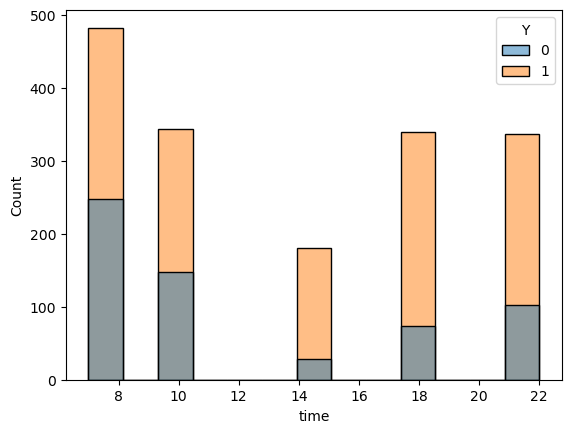

In [126]:
sns.histplot(data=carryout, x='time', hue='Y')

In [128]:
time_inc = carryout.groupby(['Y', 'time', 'income_min']).agg('count')
time_inc

destination  passanger  weather  temperature  coupon  \
Y time income_min                                                         
0 7    0                    29         29       29           29      29   
       12500                36         36       36           36      36   
...                        ...        ...      ...          ...     ...   
1 22   87500                25         25       25           25      25   
       100000               41         41       41           41      41   

                   expiration  gender  age  maritalStatus  has_children  \
Y time income_min                                                         
0 7    0                   29      29   29             29            29   
       12500               36      36   36             36            36   
...                       ...     ...  ...            ...           ...   
1 22   87500               25      25   25             25            25   
       100000              41      41   41             41            41   

                   education  occupation  income  Bar  CoffeeHouse  CarryAway  \
Y time income_min                                                               
0 7    0                  29          29      29   29           29         29   
       12500              36          36      36   36           36         36   
...                      ...         ...     ...  ...          ...        ...   
1 22   87500              25          25      25   25           25         25   
       100000             41          41      41   41           41         41   

                   RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
Y time income_min                                                             
0 7    0                             29                29                29   
       12500                         36                36                36   
...                                 ...               ...               ...   
1 22   87500                         25                25                25   
       100000                        41                41                41   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
Y time income_min                                                         
0 7    0                          29                 29              29   
       12500                      36                 36              36   
...                              ...                ...             ...   
1 22   87500                      25                 25              25   
       100000                     41                 41              41   

                   direction_opp  
Y time income_min                 
0 7    0                      29  
       12500                  36  
...                          ...  
1 22   87500                  25  
       100000                 41  

[90 rows x 23 columns]

In [130]:
#Querying on income <50k and time before noon for accepted and declined
carryout_less50k_beforenoon_y = time_inc.query('Y == 1 and income_min < 50000 and time < 12')
carryout_less50k_beforenoon_total = time_inc.query('income_min < 50000 and time < 12')

#Calculating acceptance rate
carryout_less50k_beforenoon = carryout_less50k_beforenoon_y['destination'].agg('sum') / carryout_less50k_beforenoon_total['destination'].agg('sum')
carryout_acceptance['Income <50k before noon'] = [carryout_less50k_beforenoon]

#Same query as before but for income >50k
carryout_greater50k_beforenoon_y = time_inc.query('Y == 1 and income_min > 50000 and time < 12')
carryout_greater50k_beforenoon_total = time_inc.query('income_min > 50000 and time < 12')

#Calculating acceptance rate
carryout_greater50k_beforenoon = carryout_greater50k_beforenoon_y['destination'].agg('sum') / carryout_greater50k_beforenoon_total['destination'].agg('sum')
carryout_acceptance['Income >50k before noon'] = [carryout_greater50k_beforenoon]

#Querying on income <50k and time after noon for accepted and declined
carryout_less50k_afternoon_y = time_inc.query('Y == 1 and income_min < 50000 and time > 12')
carryout_less50k_afternoon_total = time_inc.query('income_min < 50000 and time > 12')

#Calculating acceptance rate
carryout_less50k_afternoon = carryout_less50k_afternoon_y['destination'].agg('sum') / carryout_less50k_afternoon_total['destination'].agg('sum')
carryout_acceptance['Income <50k after noon'] = [carryout_less50k_afternoon]

#Same query as before but for income >50k
carryout_greater50k_afternoon_y = time_inc.query('Y == 1 and income_min > 50000 and time > 12')
carryout_greater50k_afternoon_total = time_inc.query('income_min > 50000 and time > 12')

#Calculating acceptance rate
carryout_greater50k_afternoon = carryout_greater50k_afternoon_y['destination'].agg('sum') / carryout_greater50k_afternoon_total['destination'].agg('sum')
carryout_acceptance['Income >50k after noon'] = [carryout_greater50k_afternoon]

carryout_acceptance

,Overall,Income <50k before noon,Income >50k before noon,Income <50k after noon,Income >50k after noon
0,0.737719,0.688272,0.643705,0.827709,0.766938


In [132]:
data['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [134]:
exp_time = carryout.groupby(['Y', 'expiration', 'time']).agg('count')

exp_2h_morning_y = exp_time.query('Y == 1 and expiration == "2h" and time < 12')
exp_2h_morning_total = exp_time.query('expiration == "2h" and time < 12')
exp_2h_morning_acceptance = exp_2h_morning_y['destination'].agg('sum') / exp_2h_morning_total['destination'].agg('sum')
carryout_acceptance['2h Expiration, morning'] = [exp_2h_morning_acceptance]

exp_1d_morning_y = exp_time.query('Y == 1 and expiration == "1d" and time < 12')
exp_1d_morning_total = exp_time.query('expiration == "1d" and time < 12')
exp_1d_morning_acceptance = exp_2h_morning_y['destination'].agg('sum') / exp_1d_morning_total['destination'].agg('sum')
carryout_acceptance['1d Expiration, morning'] = [exp_1d_morning_acceptance]

exp_2h_afternoon_y = exp_time.query('Y == 1 and expiration == "2h" and time > 12')
exp_2h_afternoon_total = exp_time.query('expiration == "2h" and time > 12')
exp_2h_afternoon_acceptance = exp_2h_afternoon_y['destination'].agg('sum') / exp_2h_afternoon_total['destination'].agg('sum')
carryout_acceptance['2h Expiration, afternoon'] = [exp_2h_afternoon_acceptance]

exp_1d_afternoon_y = exp_time.query('Y == 1 and expiration == "1d" and time > 12')
exp_1d_afternoon_total = exp_time.query('expiration == "1d" and time > 12')
exp_1d_afternoon_acceptance = exp_1d_afternoon_y['destination'].agg('sum') / exp_1d_afternoon_total['destination'].agg('sum')
carryout_acceptance['1d Expiration, afternoon'] = [exp_1d_afternoon_acceptance]

carryout_acceptance

,Overall,Income <50k before noon,Income >50k before noon,Income <50k after noon,Income >50k after noon,"2h Expiration, morning","1d Expiration, morning","2h Expiration, afternoon","1d Expiration, afternoon"
0,0.737719,0.688272,0.643705,0.827709,0.766938,0.615512,0.608483,0.764085,0.823681


# Independent Investigation Findings

## Carryout Coupons and Time of Day

1. Coupons for carryout and take away restaurants are more often given out in the morning and evening. This makes sense, due to the fact that during lunch time, people are already going to restaurants without the need of a coupon to entice them.
2. Although more coupons are offered in the morning, a greater proportion are accepted in the afternoon/evening
3. Income level does not have much affect on acceptance rate before noon; acceptance rates for the morning are below the expected acceptance rate over the entire day, regardless of income level. Income has a larger effect in the afternoon, where lower income individuals are about 10% more likely to accept the coupon compared to the average acceptance rate.
4. Expiration date of the coupon has little affect on acceptance rate in the morning, however it has a significant effect in the afternoon. Coupons that expire in 2h have a similar acceptance rate to the daily average, however coupons that expire in 1 day are about 10% more likely to be accepted

## Hypothesis
The time of day that a coupon is offerred has a significant impact on whether a person will accept the coupon. I hypothesize this is due to peoples' schedules. In the morning and mid day, people are less likely to accept a coupon for a carryout restaurant, because they have already taken care of breakfast/lunch. People are more likely to accept a coupon in the afternoon/evening because they are more likely to eat dinner from a carryout restaurant.